In [24]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv("train.csv")

In [26]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [28]:
wild_type = "VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK"

In [29]:
def find_prot_seq_code(sequence):
    seq_code = 0
    for i in range(len(sequence)):
        seq_code += ord(sequence[i])
    return seq_code

In [30]:
wild_type_code=find_prot_seq_code(wild_type)
wild_type_code

16805

In [31]:
df.protein_sequence.apply(find_prot_seq_code)

0         25672
1         21516
2         37558
3         19971
4        112325
          ...  
31385     41919
31386     35758
31387      9723
31388     45173
31389     41432
Name: protein_sequence, Length: 31390, dtype: int64

In [32]:
df["prot_seq_code"] = df.protein_sequence.apply(find_prot_seq_code)

In [33]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm,prot_seq_code
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,25672
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,21516
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,37558
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,19971
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,112325


In [34]:
# code difference between wild type and mutations

code_diff = df.prot_seq_code - wild_type_code
code_diff

0         8867
1         4711
2        20753
3         3166
4        95520
         ...  
31385    25114
31386    18953
31387    -7082
31388    28368
31389    24627
Name: prot_seq_code, Length: 31390, dtype: int64

In [61]:
(code_diff == 0).sum()

2

In [43]:
df["code_diff"] = code_diff

In [44]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm,prot_seq_code,code_diff
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,25672,8867
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,21516,4711
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,37558,20753
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,19971,3166
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,112325,95520


In [45]:
df.corr()

,seq_id,pH,tm,prot_seq_code,code_diff
seq_id,1.000000,-0.040164,0.008750,-0.001679,-0.001679
pH,-0.040164,1.000000,-0.044544,0.020202,0.020202
tm,0.008750,-0.044544,1.000000,-0.059282,-0.059282
prot_seq_code,-0.001679,0.020202,-0.059282,1.000000,1.000000
code_diff,-0.001679,0.020202,-0.059282,1.000000,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

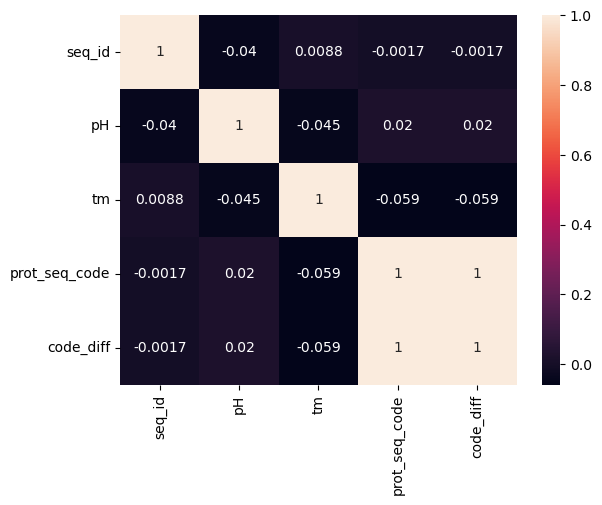

In [46]:
sns.heatmap(df.corr(), annot=True);

In [47]:
df.nunique()

seq_id              31390
protein_sequence    28981
pH                    115
data_source           324
tm                    770
prot_seq_code       21576
code_diff           21576
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
df.isnull().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
prot_seq_code          0
code_diff              0
dtype: int64

<IPython.core.display.Javascript object>

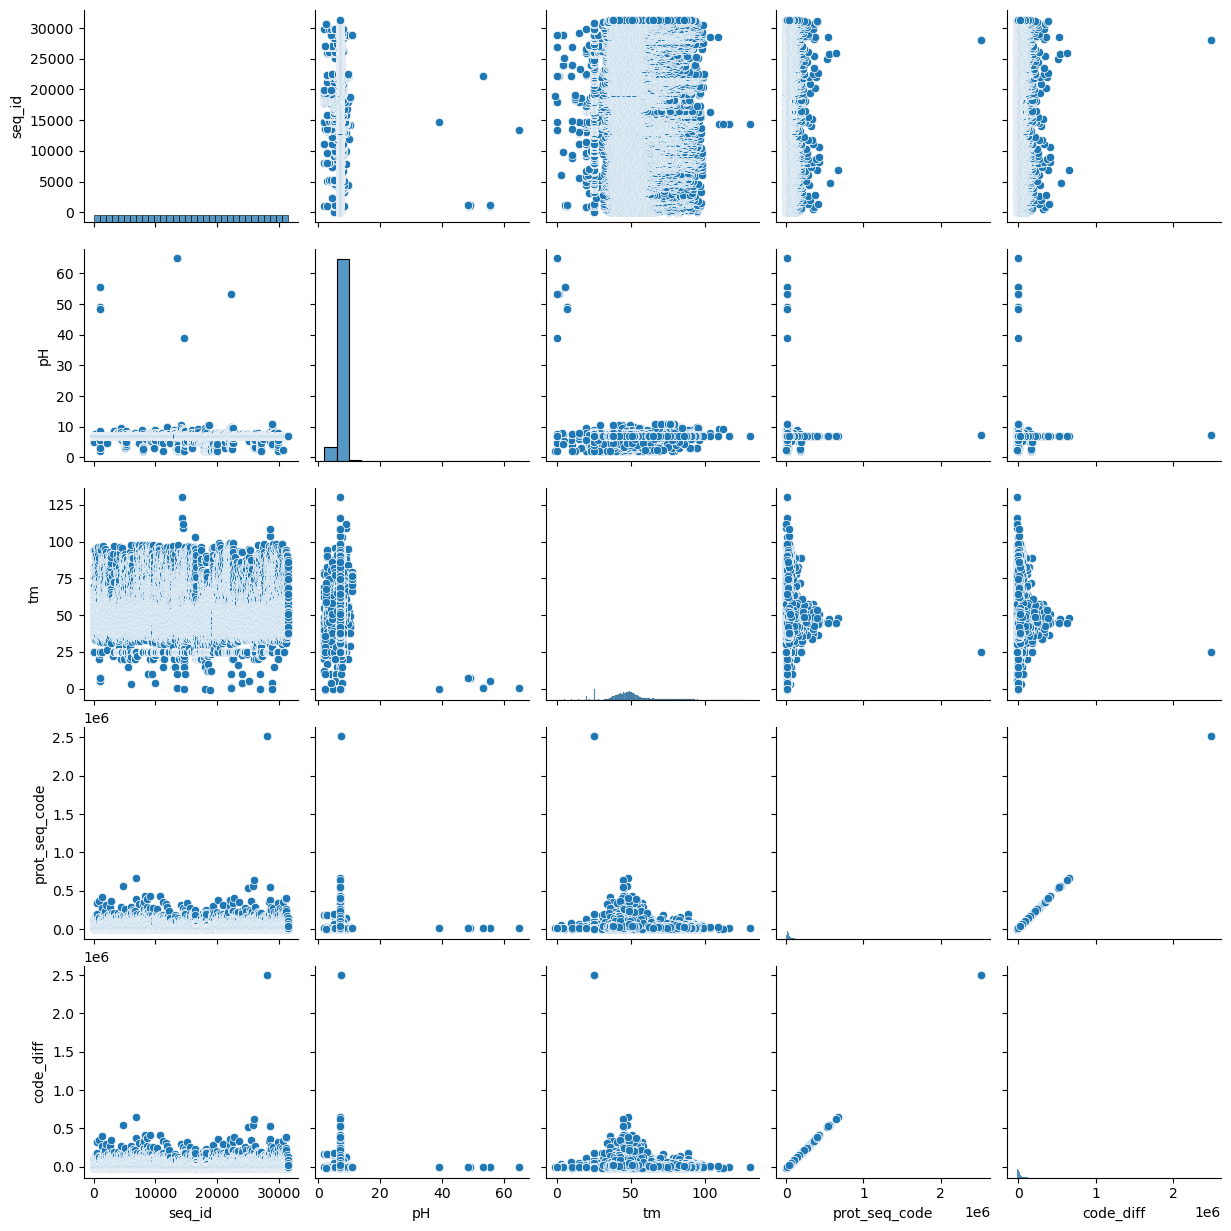

In [50]:
sns.pairplot(df);

In [51]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm,prot_seq_code,code_diff
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,25672,8867
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,21516,4711
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,37558,20753
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,19971,3166
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,112325,95520


In [62]:
X = df.drop(columns= ["seq_id", "protein_sequence", "data_source", "prot_seq_code"])
y = df.tm

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=101)

In [65]:
model.fit(X_train, y_train)

[22:45:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=101)

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [67]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [68]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999908,0.999904
mae,0.095148,0.095361
mse,0.018052,0.018620
rmse,0.134359,0.136456


In [69]:
df_test = pd.read_csv("test.csv")

In [70]:
df_test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


<IPython.core.display.Javascript object>

<AxesSubplot:>

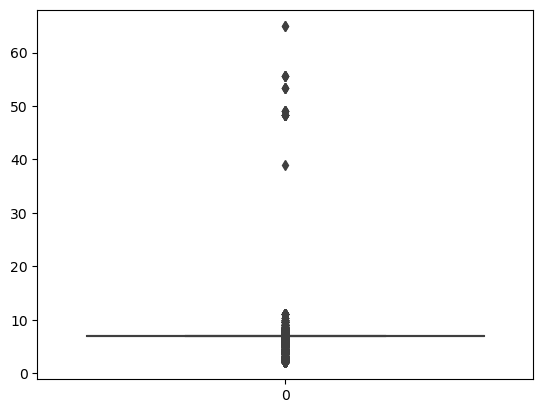

In [72]:
sns.boxplot(df.pH)

In [74]:
(df.pH>14).sum()

29

In [75]:
(df.pH<0).sum()

0

In [76]:
df.describe()

,seq_id,pH,tm,prot_seq_code,code_diff
count,31390.000000,31104.000000,31390.000000,3.139000e+04,3.139000e+04
mean,15694.500000,6.892339,49.147337,3.408673e+04,1.728173e+04
std,9061.656811,1.612225,14.010089,4.902047e+04,4.902047e+04
min,0.000000,1.990000,-1.000000,3.890000e+02,-1.641600e+04
25%,7847.250000,7.000000,42.100000,1.499050e+04,-1.814500e+03
50%,15694.500000,7.000000,48.000000,2.547450e+04,8.669500e+03
75%,23541.750000,7.000000,53.800000,3.986800e+04,2.306300e+04
max,31389.000000,64.900000,130.000000,2.512992e+06,2.496187e+06


## outlier lara bakılacak